In [1]:
import numpy as np
import pandas as pd


C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### `Loading Dataset & discover it

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
## going with only 2 features (income and spending score)

In [6]:
df = df[["Annual Income (k$)","Spending Score (1-100)"]]


In [7]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Scale (Normalizing)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [11]:
df_normalized.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


### Visual Exploration

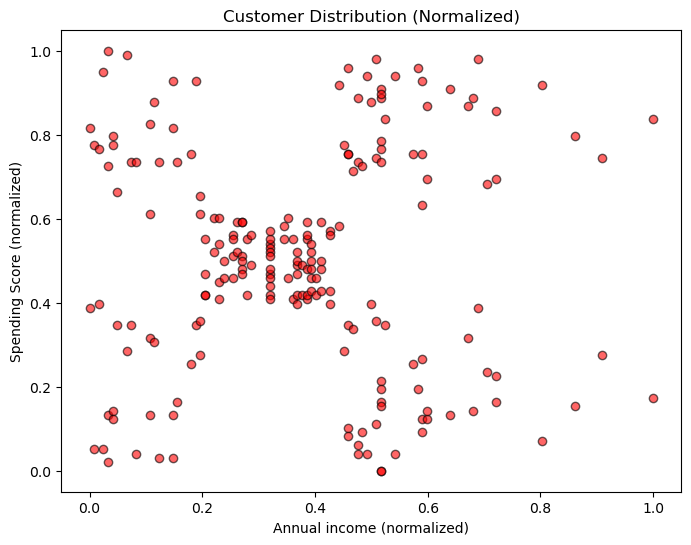

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    df_normalized["Annual Income (k$)"],
    df_normalized["Spending Score (1-100)"],
    color="r",
    alpha=0.6,
    edgecolor="k"
)

plt.xlabel("Annual income (normalized)")
plt.ylabel("Spending Score (normalized)")
plt.title("Customer Distribution (Normalized)")
plt.show()


### K means Algorithm

C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

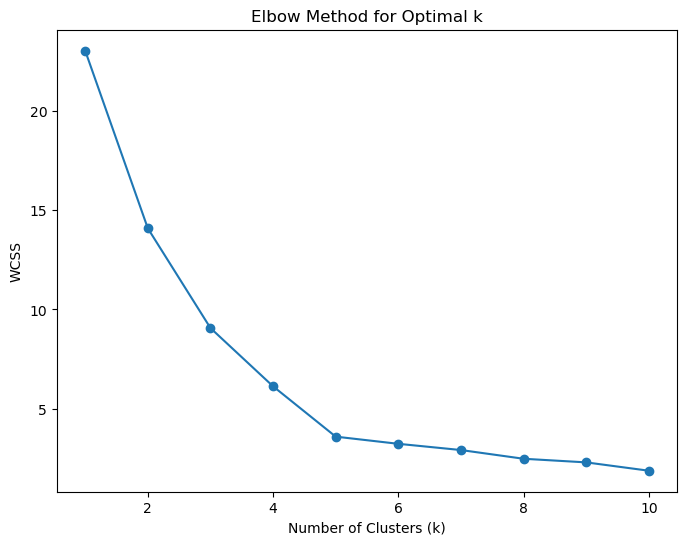

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [19]:
## based on above graph we can know that the optimal k value is >> 5

In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_normalized["Cluster"] = kmeans.fit_predict(df_normalized)

C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
df["Cluster"] = df_normalized["Cluster"]

C:\Users\prasad ayithireddy\AppData\Local\Temp\ipykernel_6536\1266085671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cluster"] = df_normalized["Cluster"]


In [22]:
df['Cluster']

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32

In [23]:
df.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


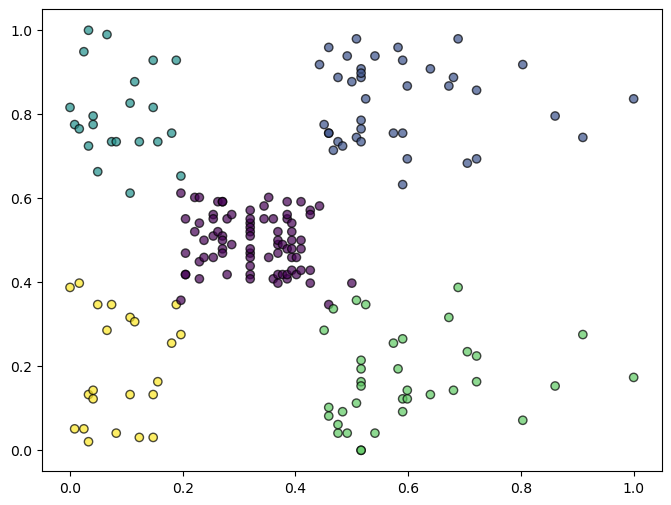

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(
    df_normalized["Annual Income (k$)"],
    df_normalized["Spending Score (1-100)"],
    c = df_normalized["Cluster"],
    cmap = "viridis",
    alpha = 0.7,
    edgecolor = 'k'
)



### Now plotting of centroinds on a scatter plot


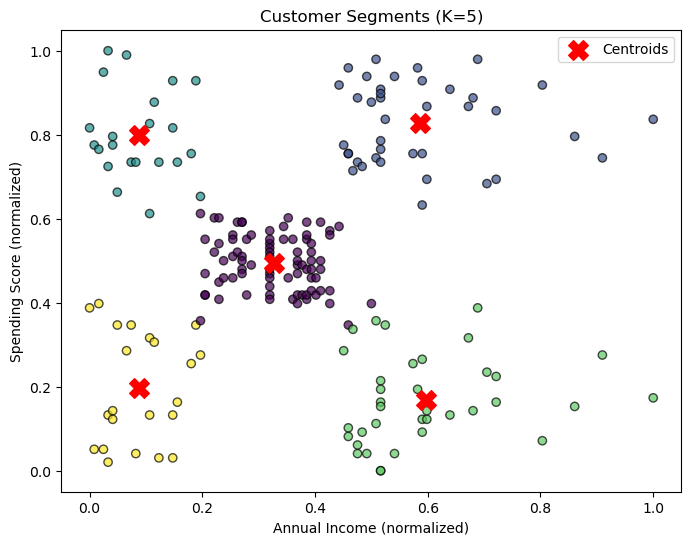

In [25]:
plt.figure(figsize=(8,6))

plt.scatter(
    df_normalized["Annual Income (k$)"],
    df_normalized["Spending Score (1-100)"],
    c = df_normalized["Cluster"],
    cmap = "viridis",
    alpha = 0.7,
    edgecolor = 'k'
)

## centroids
centers = kmeans.cluster_centers_
plt.scatter(
centers[:,0],centers[:,1],
    c="red",s=200,marker="X",label="Centroids"
)

plt.xlabel("Annual Income (normalized)")
plt.ylabel("Spending Score (normalized)")
plt.title("Customer Segments (K=5)")
plt.legend()
plt.show()

### Interpreting the clusters



##### Grouping by the two features ["Annual income (k) & Spending Score] to label each cluster

In [26]:
# group by cluster and get averages of original values

cluster_summary  = df.groupby("Cluster")[["Annual Income (k$)","Spending Score (1-100)"]].mean()

In [27]:
cluster_summary

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,54.888889,49.543210
1,86.538462,82.128205
2,25.727273,79.363636
3,87.750000,17.583333
4,25.727273,20.227273


### label and visuallize

In [30]:
import matplotlib.pyplot as plt
import numpy as np

cluster_labels = {
    0:"Mid Income, Moderate Spending",
    1:"Wealthy, Low Spending",
    2:"Low Income, Low Spending",
    3:"Low Income, High Spending",
    4:"Wealthy, High Spending"
}

counts = df["Cluster"].value_counts().sort_index()
pct = (counts / counts.sum()*100).round(1)

centers_original = (
df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean().reindex(range(5)).values)

In [31]:
centers_original

array([[54.88888889, 49.54320988],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [87.75      , 17.58333333],
       [25.72727273, 20.22727273]])

In [32]:
label_texts = {}

for i in range(5):
    base = cluster_labels.get(i,f"Cluster {i}")
    n = int(counts.get(i,0))
    p = pct.get(i,0.0)
    label_texts[i] = f"{base}\n(n={n}, {p}%)"

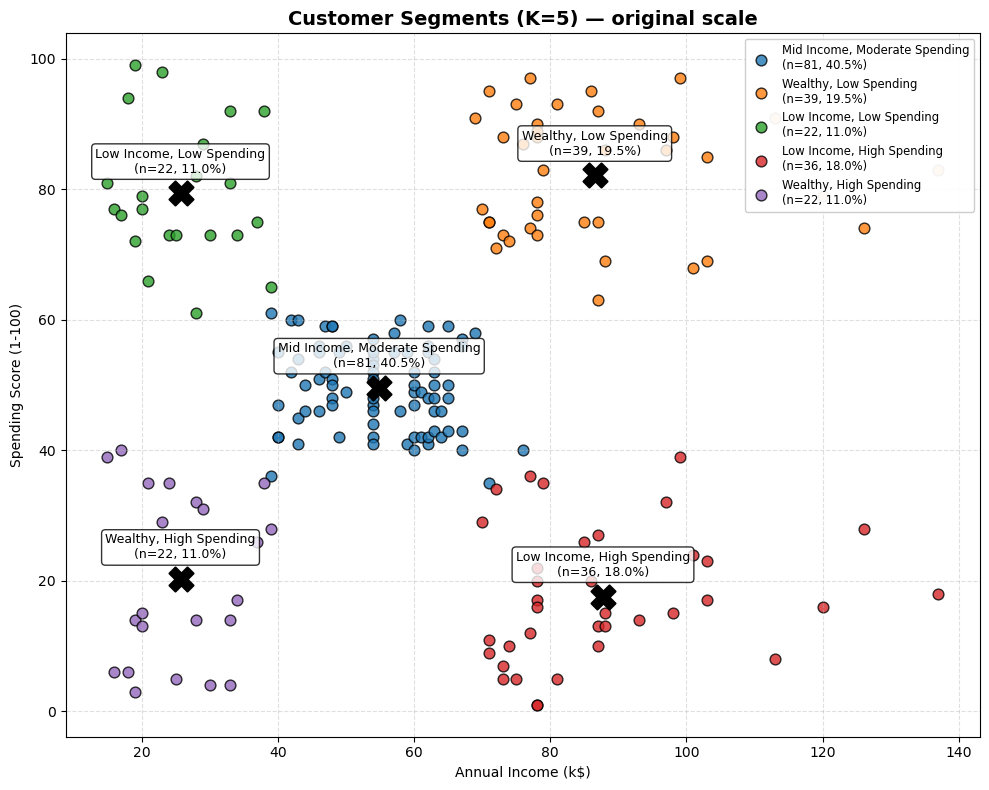

In [34]:
# --- plot each cluster separately with distinct colors for clarity ---
plt.figure(figsize=(10,8))
colors = plt.cm.tab10(np.arange(5))  # 5 distinct colors

for i in range(5):
    mask = df["Cluster"] == i
    plt.scatter(
        df.loc[mask, "Annual Income (k$)"],
        df.loc[mask, "Spending Score (1-100)"],
        s=60,
        alpha=0.8,
        edgecolor="k",
        color=colors[i],
        label=label_texts[i]
    )
    
    
# --- plot centroids (big X markers) ---
plt.scatter(centers_original[:, 0], centers_original[:, 1],
            marker="X", s=300, c="black", linewidths=1.5, zorder=5)


# --- annotate centroids (offset so text does not overlap markers) ---
for i, (x, y) in enumerate(centers_original):
    plt.annotate(
        label_texts[i],
        xy=(x, y),
        xytext=(0, 15),            # offset (x,y) by 15 points upward
        textcoords="offset points",
        ha="center",
        fontsize=9,
        bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.3")
    )
    
    
# --- styling ---
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (K=5) — original scale", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="upper right", fontsize="small", framealpha=0.95)
plt.tight_layout()
plt.show()

### DBSCAN ALGORITHM

In [35]:
df_normalized = df_normalized.drop(columns=["Cluster"])


In [36]:
df_normalized.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [37]:
from sklearn.cluster import DBSCAN


In [38]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
labels = dbscan.fit_predict(df_normalized)



In [40]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

In [41]:
np.unique(labels,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([79,  6, 78, 10, 10, 12,  5], dtype=int64))

### To choose the optimal min_samples

In [42]:
for eps in np.arange(0.01, 0.2, 0.01):
    for min_samples in range(3,6):
        dbscan = DBSCAN(eps = eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_normalized)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        n_noise = list(labels).count(-1)
        print(f"eps={eps:.2f}, min_samples={min_samples} --> clusters: {n_clusters}, noise: {n_noise}")

eps=0.01, min_samples=3 --> clusters: 2, noise: 194
eps=0.01, min_samples=4 --> clusters: 0, noise: 200
eps=0.01, min_samples=5 --> clusters: 0, noise: 200
eps=0.02, min_samples=3 --> clusters: 11, noise: 142
eps=0.02, min_samples=4 --> clusters: 3, noise: 176
eps=0.02, min_samples=5 --> clusters: 3, noise: 179
eps=0.03, min_samples=3 --> clusters: 15, noise: 94
eps=0.03, min_samples=4 --> clusters: 9, noise: 122
eps=0.03, min_samples=5 --> clusters: 5, noise: 152
eps=0.04, min_samples=3 --> clusters: 10, noise: 77
eps=0.04, min_samples=4 --> clusters: 6, noise: 91
eps=0.04, min_samples=5 --> clusters: 4, noise: 103
eps=0.05, min_samples=3 --> clusters: 13, noise: 42
eps=0.05, min_samples=4 --> clusters: 9, noise: 65
eps=0.05, min_samples=5 --> clusters: 6, noise: 79
eps=0.06, min_samples=3 --> clusters: 12, noise: 29
eps=0.06, min_samples=4 --> clusters: 8, noise: 45
eps=0.06, min_samples=5 --> clusters: 8, noise: 57
eps=0.07, min_samples=3 --> clusters: 8, noise: 16
eps=0.07, min_sam

#### Visualizing the clusters¶
#### I'll choose eps=0.09, min_samples=4 as blance between no. of clusters and noise!! ( clusters: 5, noise: 14)¶

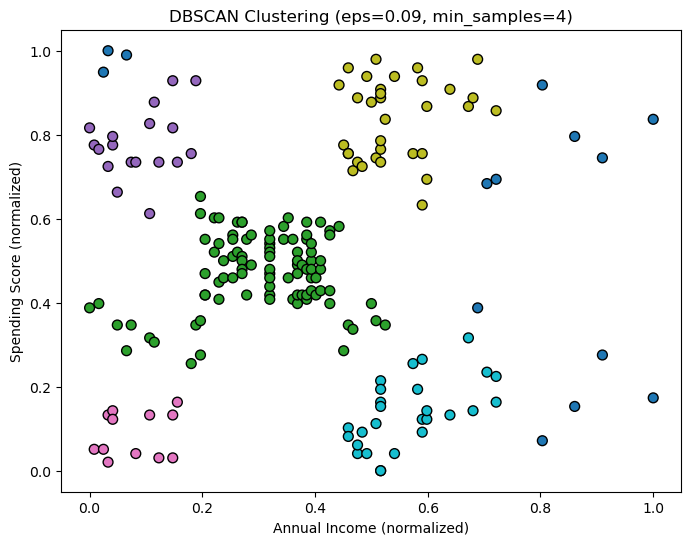

In [43]:
dbscan = DBSCAN(eps=0.09, min_samples=4)
labels = dbscan.fit_predict(df_normalized)

plt.figure(figsize=(8,6))
plt.scatter(df_normalized['Annual Income (k$)'], df_normalized['Spending Score (1-100)'], 
            c=labels, cmap='tab10', s=50, edgecolor='k')
plt.title('DBSCAN Clustering (eps=0.09, min_samples=4)')
plt.xlabel('Annual Income (normalized)')
plt.ylabel('Spending Score (normalized)')
plt.show()

### analyze average spending per cluster

In [45]:
df["DBSCAN_Cluster"] = labels

df.groupby("DBSCAN_Cluster")[["Annual Income (k$)","Spending Score (1-100)"]].mean()

C:\Users\prasad ayithireddy\AppData\Local\Temp\ipykernel_6536\3981280147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DBSCAN_Cluster"] = labels


,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,
-1,96.785714,61.714286
0,52.645833,47.312500
1,25.944444,77.222222
2,24.583333,9.583333
3,81.060606,83.000000
4,83.925926,14.444444


Interpretation of DBSCAN Clusters
Cluster -1 (Noise / Outliers): Customers with very high annual income (~97k$) and medium spending score (~62) who don’t fit neatly into other groups. They might be irregular shoppers or unusual cases.

Cluster 0: Customers with moderate annual income (~53k$) and moderate spending (~47) — these are average spenders with average income.

Cluster 1: Customers with low annual income (~26k$) but high spending score (~77) — possibly younger or budget-conscious customers who spend a lot relative to their income.

Cluster 2: Customers with low income (~25k$) and low spending (~10) — cautious or less engaged shoppers with limited spending.

Cluster 3: Customers with high income (~81k$) and high spending (~83) — premium, loyal, or very engaged customers who spend a lot.

Cluster 4: Customers with high income (~84k$) but low spending (~14) — wealthy customers who don’t spend much, possibly infrequent buyers or less engaged.

##### Business Takeaway:¶
Tailor marketing strategies per segment:

Reward high spenders (Clusters 1 & 3) with loyalty programs.

Encourage Cluster 4 (high income, low spending) with targeted offers.

Find ways to engage low spenders (Clusters 0 & 2) better.

for -1 [points, kust forget them 😊